# Análise Financeira e Previsão de Receita

## Introdução

Neste projeto, nosso objetivo é desenvolver um modelo preditivo para a previsão de receita de uma empresa utilizando dados históricos de vendas. A capacidade de prever receitas futuras com precisão é crucial para a tomada de decisões estratégicas e planejamento financeiro. Utilizando o "Online Retail Dataset" do UCI Machine Learning Repository, exploraremos os dados, realizaremos análises detalhadas e construiremos modelos preditivos para atingir nossos objetivos.

## Problema

Empresas frequentemente enfrentam desafios na previsão de receitas futuras devido a flutuações no mercado, sazonalidades e outros fatores imprevisíveis. Uma previsão precisa de receita permite uma melhor alocação de recursos, planejamento de estoque, estratégias de marketing e outras decisões cruciais para o sucesso da empresa. No entanto, a falta de ferramentas e modelos preditivos robustos pode dificultar esse processo.

## Objetivos

Os objetivos deste projeto são:

1. **Coletar e Compreender os Dados:**
   - Carregar e explorar o "Online Retail Dataset" para entender sua estrutura e características.

2. **Preparação dos Dados:**
   - Limpar e transformar os dados para remover inconsistências e preparar o conjunto de dados para análise.

3. **Análise Exploratória dos Dados (EDA):**
   - Realizar uma análise exploratória dos dados para identificar padrões, tendências sazonais e insights iniciais.

4. **Feature Engineering:**
   - Criar novas features a partir dos dados brutos que possam melhorar o desempenho dos modelos preditivos.

5. **Construção de Modelos Preditivos:**
   - Desenvolver e treinar diferentes modelos de previsão de receita utilizando técnicas como regressão linear, árvores de decisão, e outros.

7. **Construção API:**
   - Desenvolvimento de uma API para realizar as consultas, será realizado fora do Notebook Jupyter.





# 1.Coletar e Compreender os Dados


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations config
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

In [58]:
shared_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(shared_url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Compreendendo a Estrutura dos Dados

Vamos explorar a estrutura do conjunto de dados, incluindo o número de linhas e colunas, tipos de dados e valores ausentes.


In [59]:
# Informações gerais sobre o conjunto de dados
display(df.info())

# Resumo estatístico das colunas numéricas
display(df.describe())

# Verificando valores ausentes
display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Tratamento de Valores Ausentes

Com base na análise inicial, sabemos que as colunas `Description` e `CustomerID` têm valores ausentes. Vamos tratar esses valores da seguinte forma:
- Remover linhas onde a `Description` está ausente.
- Remover linhas onde o `CustomerID` está ausente.

In [60]:
# Remover linhas com valores ausentes em Description e CustomerID
df = df.dropna(subset=['Description', 'CustomerID'])

# Verificando novamente valores ausentes
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Além de valores ausentes, também foi identificado valores negativos nos campos `Quantity` e `UnityPrice`, poranto iremos remover os valores que são menores do que 0.

In [61]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


### Exploração Inicial dos Dados

Vamos explorar alguns aspectos iniciais dos dados, como a distribuição das vendas ao longo do tempo, os produtos mais vendidos e a distribuição geográfica das vendas.


<ipython-input-62-6cac42608807>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


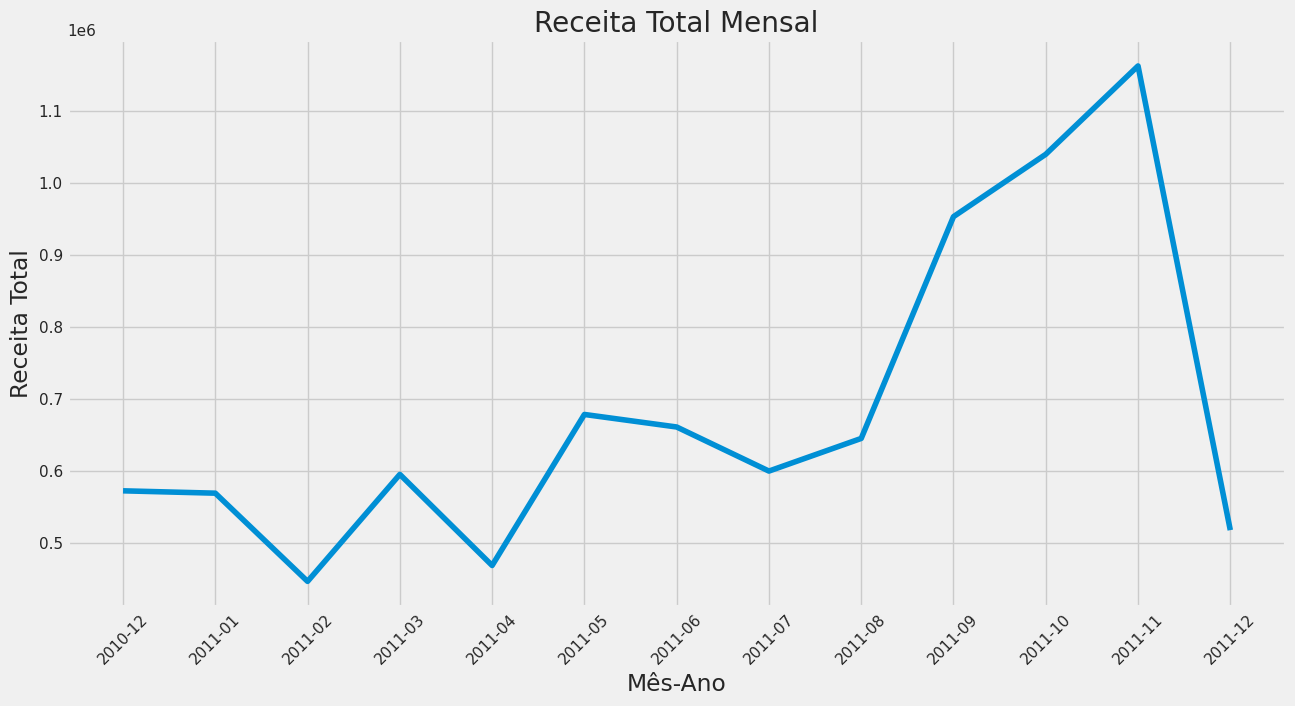

In [62]:
# Criar uma nova coluna para o valor total de cada linha (Quantidade * Preço Unitário)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Agrupar por mês e ano e somar o valor total
df['MonthYear'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
monthly_sales = df.groupby('MonthYear')['TotalPrice'].sum().reset_index()

# Plotar a receita total mensal
plt.figure(figsize=(14, 7))
sns.lineplot(x='MonthYear', y='TotalPrice', data=monthly_sales)
plt.xticks(rotation=45)
plt.title('Receita Total Mensal')
plt.xlabel('Mês-Ano')
plt.ylabel('Receita Total')
plt.show()

- A receita total mensal mostra um aumento significativo em novembro de 2011, indicando um possível pico sazonal de vendas. O gráfico de linha ilustra claramente as flutuações de receita ao longo do período analisado.

#### Produtos Mais Vendidos
Vamos identificar os produtos mais vendidos em termos de quantidade.

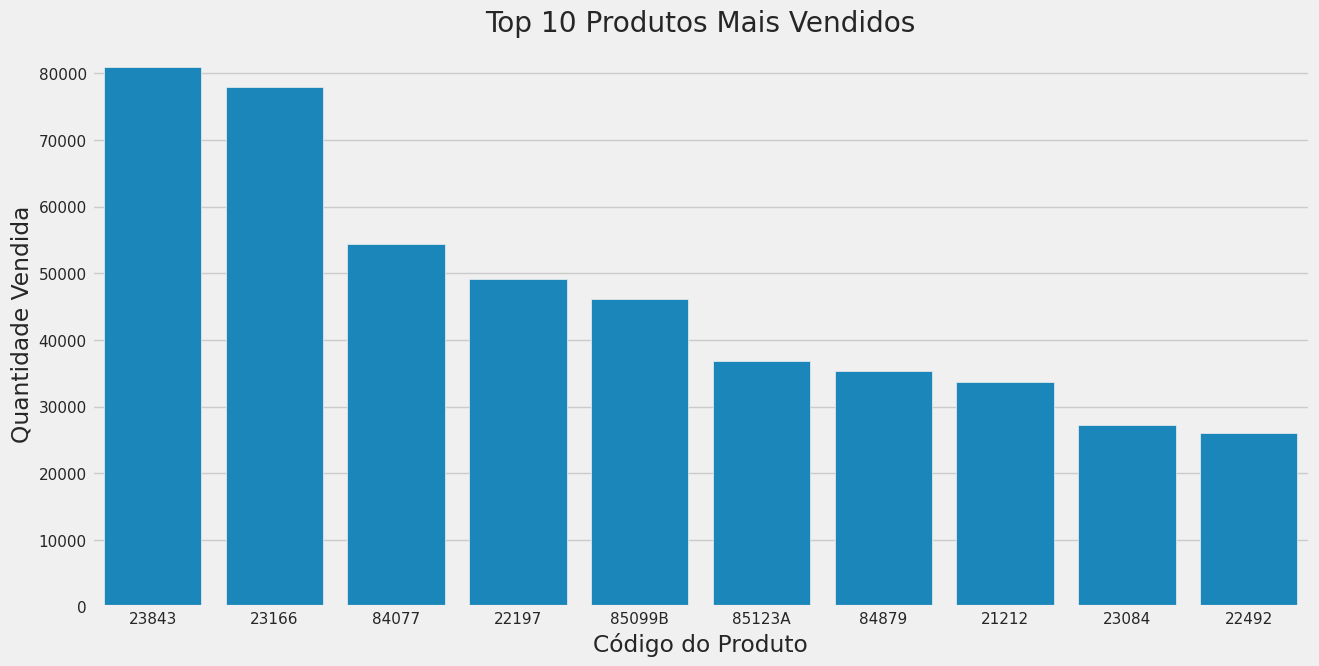

,StockCode,Quantity,Description
0,23843,80995,"PAPER CRAFT , LITTLE BIRDIE"
1,23166,77916,MEDIUM CERAMIC TOP STORAGE JAR
199,84077,54415,WORLD WAR 2 GLIDERS ASSTD DESIGNS
672,22197,49183,SMALL POPCORN HOLDER
1740,85099B,46181,JUMBO BAG RED RETROSPOT
3358,85123A,36782,WHITE HANGING HEART T-LIGHT HOLDER
5393,84879,35362,ASSORTED COLOUR BIRD ORNAMENT
6801,21212,33693,PACK OF 72 RETROSPOT CAKE CASES
7869,23084,27202,RABBIT NIGHT LIGHT
8711,22492,26076,MINI PAINT SET VINTAGE


In [63]:
# Agrupar por StockCode e somar a quantidade vendida
top_products = df.groupby('StockCode')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Visualizar os produtos mais vendidos
plt.figure(figsize=(14, 7))
sns.barplot(x='StockCode', y='Quantity', data=top_products)
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Código do Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

# show a table with the most selled products, join StockCode to Description to obtain the name
display(top_products.merge(df[['StockCode', 'Description']], on='StockCode', how='left').drop_duplicates(['StockCode']))


- Os produtos com os códigos `84077 - WORLD WAR 2 GLIDERS ASSTD DESIGNS`, `22197 - SMALL POPCORN HOLDER`, e `85099B - JUMBO BAG RED RETROSPOT` são os mais vendidos em termos de quantidade. A tabela e o gráfico de barras proporcionam uma visão clara dos produtos mais populares.


#### Distribuição Geográfica das Vendas
Vamos visualizar a distribuição das vendas por país.

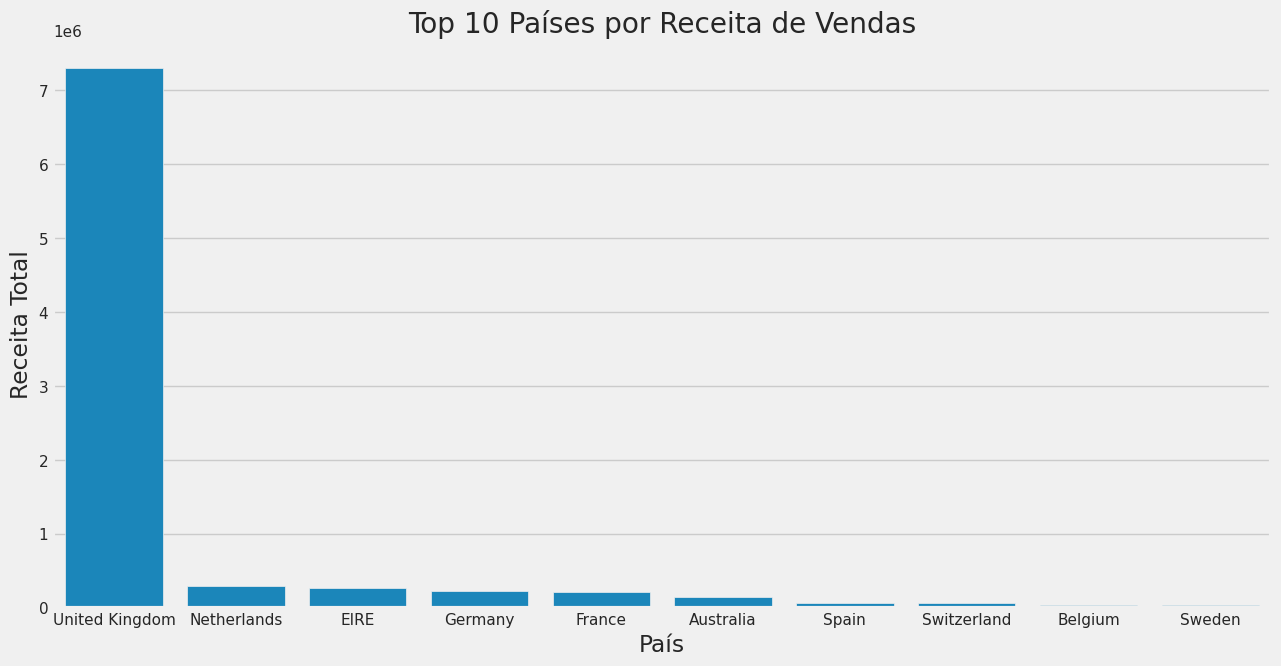

In [64]:
# Agrupar por país e somar o valor total
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalPrice', ascending=False).head(10)

# Visualizar a distribuição das vendas por país
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalPrice', data=country_sales)
plt.title('Top 10 Países por Receita de Vendas')
plt.xlabel('País')
plt.ylabel('Receita Total')
plt.show()


- O Reino Unido é, de longe, o país com a maior receita de vendas, seguido por países como Holanda, Irlanda (EIRE), e Alemanha. Este padrão é visualizado no gráfico de barras, destacando os principais mercados.

# 2.Preparação dos Dados

1. **Conversão de Tipos de Dados:**
   - Garantir que as colunas de data estejam no formato datetime.

2. **Criação de Features:**
   - Criar novas features a partir dos dados existentes para melhorar o desempenho do modelo preditivo.
   - Exemplos incluem a extração de componentes de data (mês, dia da semana), criação de variáveis de atraso (lag features), etc.

3. **Remoção de Outliers:**
   - Identificar e remover outliers que podem distorcer a análise e os modelos preditivos.

In [65]:
# Garantir que a coluna InvoiceDate esteja no formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verificar e ajustar tipos de dados de outras colunas, se necessário
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
 9   MonthYear    397884 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 33.4+ MB


### Criação de Features

In [66]:
# Extrair componentes de data (ano, mês, dia, dia da semana)
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Criar variáveis de atraso (lag features) para a receita total
df['Lag_1'] = df['TotalPrice'].shift(1)
df['Lag_7'] = df['TotalPrice'].shift(7)
df['Lag_30'] = df['TotalPrice'].shift(30)

# Visualizar as primeiras linhas com as novas features
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,MonthYear,Year,Month,Day,DayOfWeek,Lag_1,Lag_7,Lag_30
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,2,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,15.30,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,2,20.34,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,22.00,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,20.34,NaN,NaN


### Remoção de Outliers

In [67]:
# Estatísticas antes da remoção de outliers
print("Estatísticas antes da remoção de outliers:")
display(df['TotalPrice'].describe())

# Identificar e remover outliers na coluna TotalPrice
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df['TotalPrice'] >= (Q1 - 1.5 * IQR)) & (df['TotalPrice'] <= (Q3 + 1.5 * IQR))
df_clean = df[outlier_mask]

# Estatísticas após a remoção de outliers
print("\nEstatísticas após a remoção de outliers:")
display(df_clean['TotalPrice'].describe())




Estatísticas antes da remoção de outliers:


count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64


Estatísticas após a remoção de outliers:


count    366643.000000
mean         11.990236
std           9.103450
min           0.001000
25%           4.200000
50%          10.200000
75%          17.340000
max          42.450000
Name: TotalPrice, dtype: float64

In [68]:
df_clean.to_csv('cleaned_data.csv', index=False)

# 3.Análise Exploratória dos Dados (EDA)

Após a preparação inicial dos dados, incluindo a remoção de outliers e a criação de novas features, vamos realizar uma Análise Exploratória dos Dados (EDA) mais aprofundada. Isso nos permitirá entender melhor os padrões e comportamentos dos dados.

1. **Distribuição das Vendas ao Longo do Tempo:**
   - Analisar a receita total ao longo do tempo, considerando as novas features criadas.

2. **Produtos Mais Vendidos:**
   - Identificar os produtos mais vendidos em termos de quantidade.

3. **Distribuição Geográfica das Vendas:**
   - Visualizar a distribuição das vendas por país.

4. **Análise das Novas Features:**
   - Analisar as novas features criadas, como componentes de data e variáveis de atraso.


In [80]:
# Carregando o conjunto de dados salvo anteriormente
df_clean = pd.read_csv('cleaned_data.csv')
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Visualizar as primeiras linhas do conjunto de dados limpo
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,MonthYear,Year,Month,Day,DayOfWeek,Lag_1,Lag_7,Lag_30
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,2,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,15.30,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,2,20.34,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,22.00,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,20.34,NaN,NaN


## Distribuição das Vendas ao Longo do Tempo

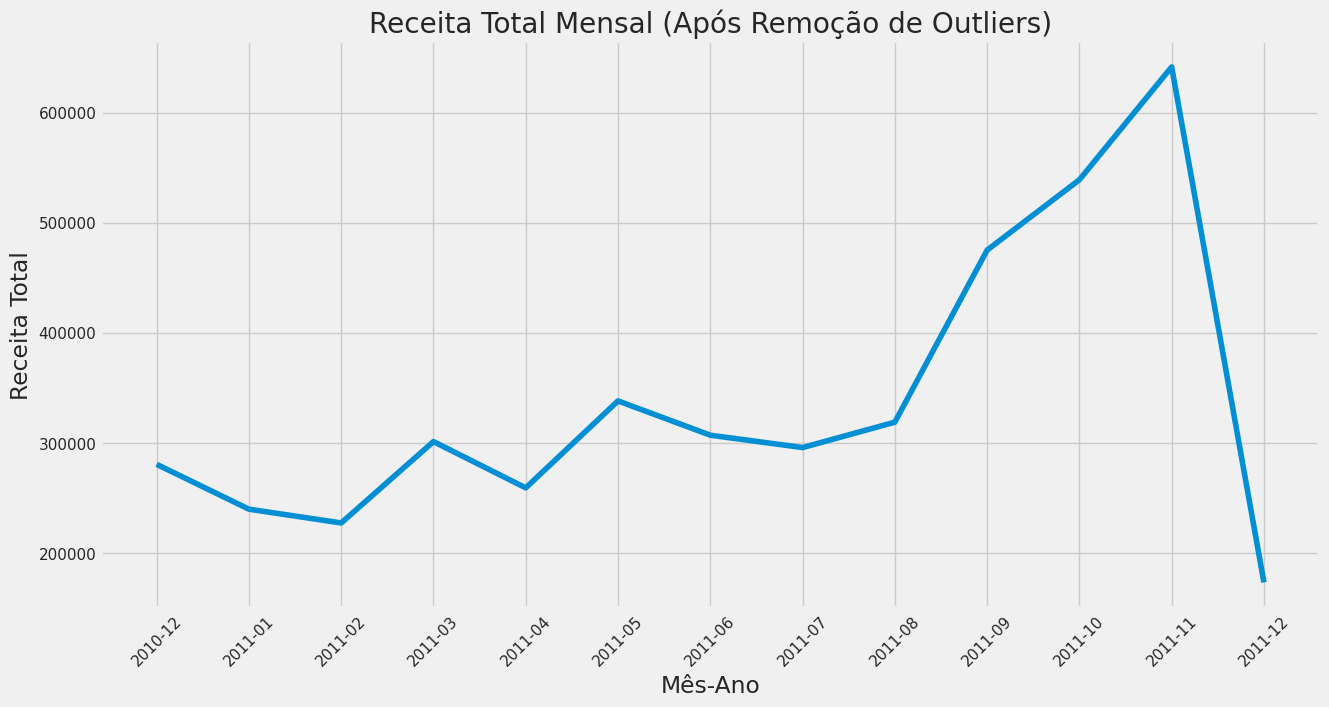

In [81]:
# Agrupar por mês e ano e somar o valor total
df_clean['MonthYear'] = df_clean['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
monthly_sales_clean = df_clean.groupby('MonthYear')['TotalPrice'].sum().reset_index()

# Plotar a receita total mensal
plt.figure(figsize=(14, 7))
sns.lineplot(x='MonthYear', y='TotalPrice', data=monthly_sales_clean)
plt.xticks(rotation=45)
plt.title('Receita Total Mensal (Após Remoção de Outliers)')
plt.xlabel('Mês-Ano')
plt.ylabel('Receita Total')
plt.show()


- O pico em 11/2011 permanece, porém há uma suavização maior após a remoção dos outliers, além disto, ainda existe a queda brusca no mês 12/2011.
- Um dos pontos que pode justificar este pico em 11/2021 é a BlackFriday que ocorre no mês de Novembro, porém seria necessário olhar para um período bem maior para entender se é um comportamento sazonal.

## Produtos Mais Vendidos

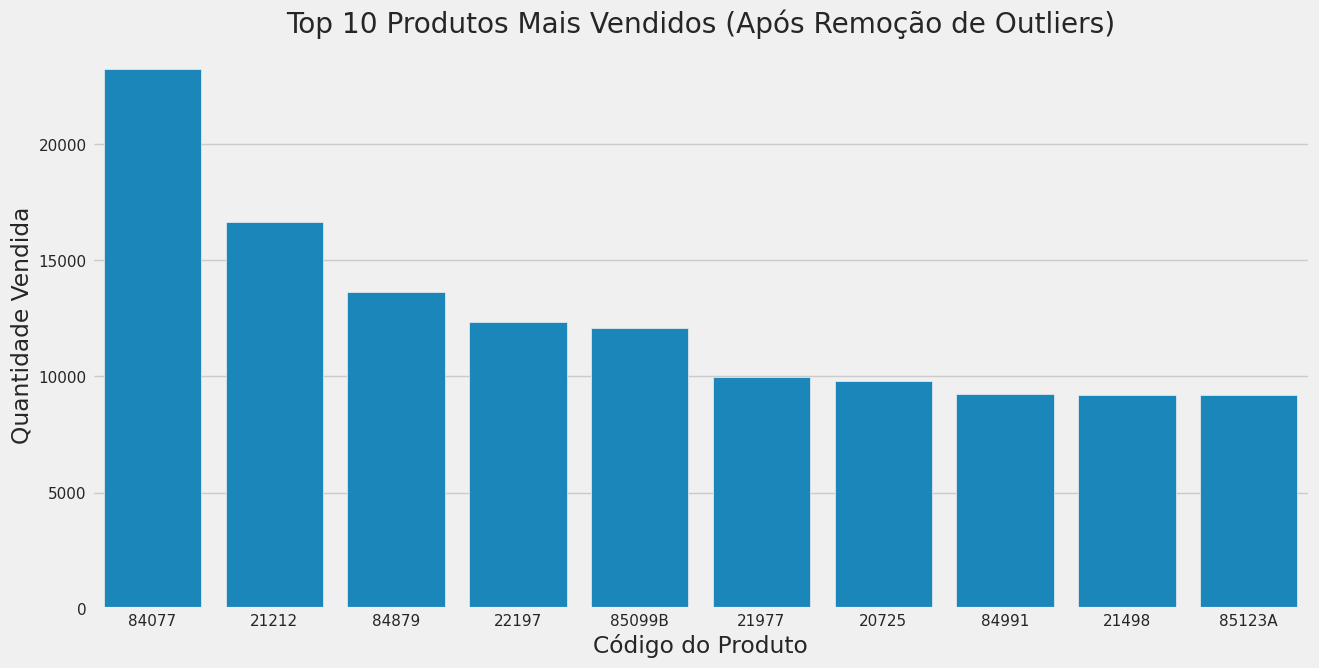

,StockCode,Quantity,Description
0,84077,23263,WORLD WAR 2 GLIDERS ASSTD DESIGNS
427,21212,16653,PACK OF 72 RETROSPOT CAKE CASES
1422,84879,13619,ASSORTED COLOUR BIRD ORNAMENT
2579,22197,12340,SMALL POPCORN HOLDER
3485,85099B,12100,JUMBO BAG RED RETROSPOT
4811,21977,9984,PACK OF 60 PINK PAISLEY CAKE CASES
5451,20725,9797,LUNCH BAG RED RETROSPOT
6658,84991,9241,60 TEATIME FAIRY CAKE CASES
7309,21498,9197,RED RETROSPOT WRAP
7640,85123A,9195,WHITE HANGING HEART T-LIGHT HOLDER


In [82]:
# Agrupar por StockCode e somar a quantidade vendida
top_products_clean = df_clean.groupby('StockCode')['Quantity'].sum().reset_index()
top_products_clean = top_products_clean.sort_values(by='Quantity', ascending=False).head(10)

# Visualizar os produtos mais vendidos
plt.figure(figsize=(14, 7))
sns.barplot(x='StockCode', y='Quantity', data=top_products_clean)
plt.title('Top 10 Produtos Mais Vendidos (Após Remoção de Outliers)')
plt.xlabel('Código do Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

display(top_products_clean.merge(df_clean[['StockCode', 'Description']], on='StockCode', how='left').drop_duplicates(['StockCode']))


- Os produtos com os códigos `84077 - WORLD WAR 2 GLIDERS ASSTD DESIGNS`, `21212 - PACK OF 72 RETROSPOT CAKE CASES`, e `84879 - ASSORTED COLOUR BIRD ORNAMENT` são os mais vendidos em termos de quantidade. A tabela e o gráfico de barras proporcionam uma visão clara dos produtos mais populares.


## Distribuição Geográfica das Vendas

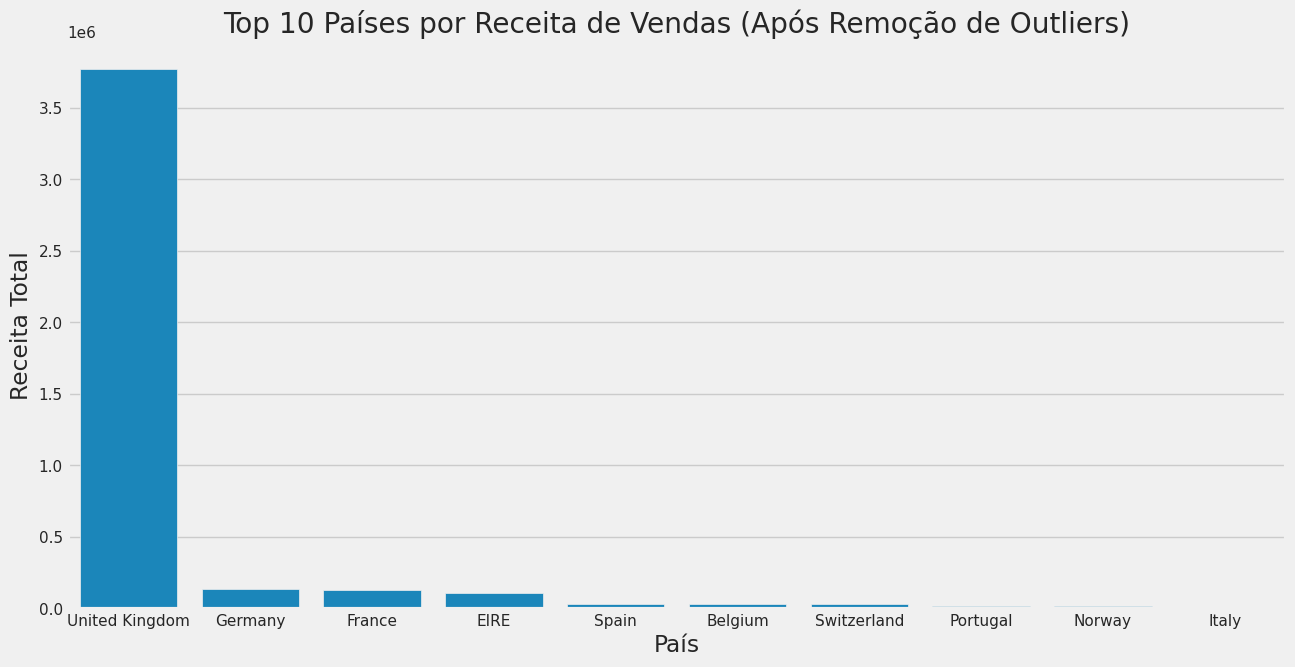

In [72]:
# Agrupar por país e somar o valor total
country_sales_clean = df_clean.groupby('Country')['TotalPrice'].sum().reset_index()
country_sales_clean = country_sales_clean.sort_values(by='TotalPrice', ascending=False).head(10)

# Visualizar a distribuição das vendas por país
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalPrice', data=country_sales_clean)
plt.title('Top 10 Países por Receita de Vendas (Após Remoção de Outliers)')
plt.xlabel('País')
plt.ylabel('Receita Total')
plt.show()


- Novamente vemos o Reino Unido a frente com um volume disparado de vendas seguido de Alemanha e França.

## Análise das Novas Features

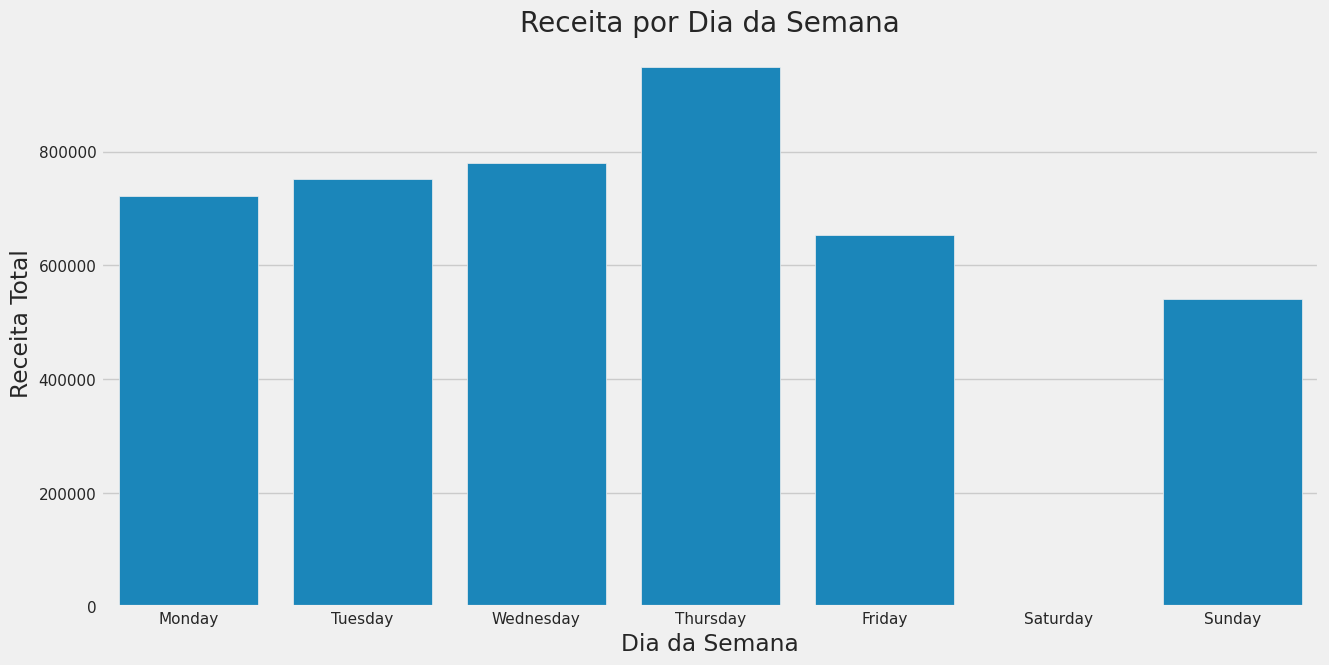

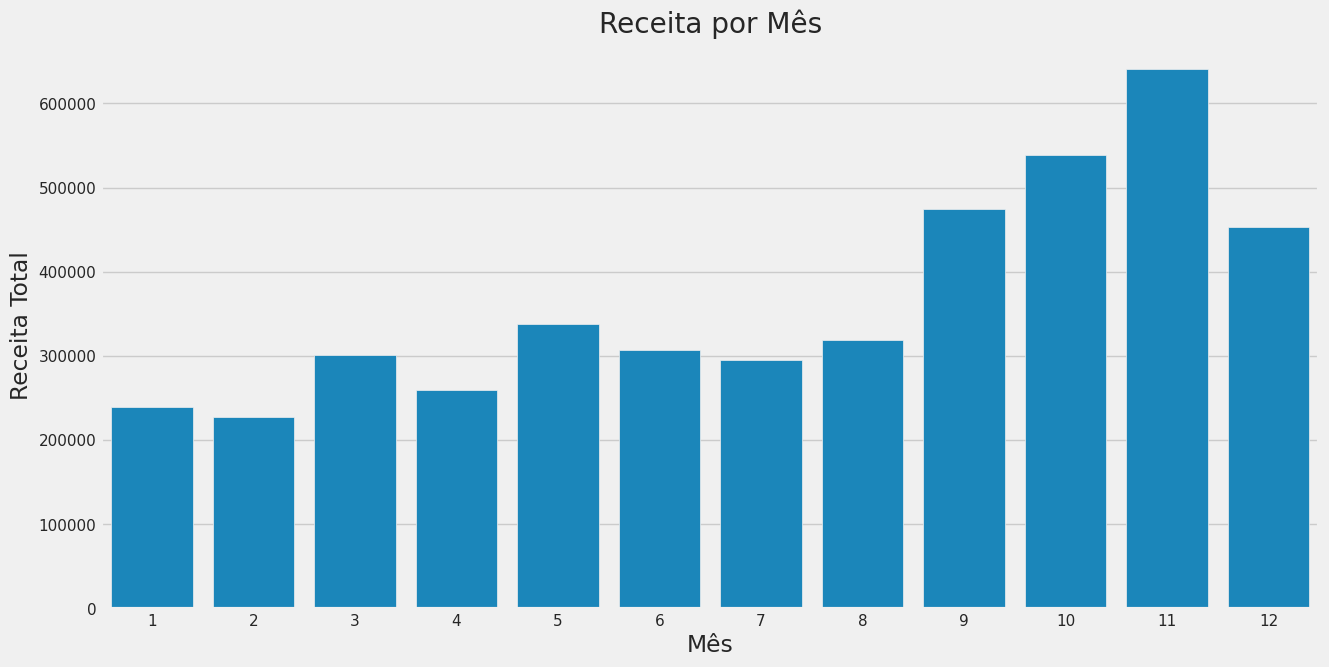

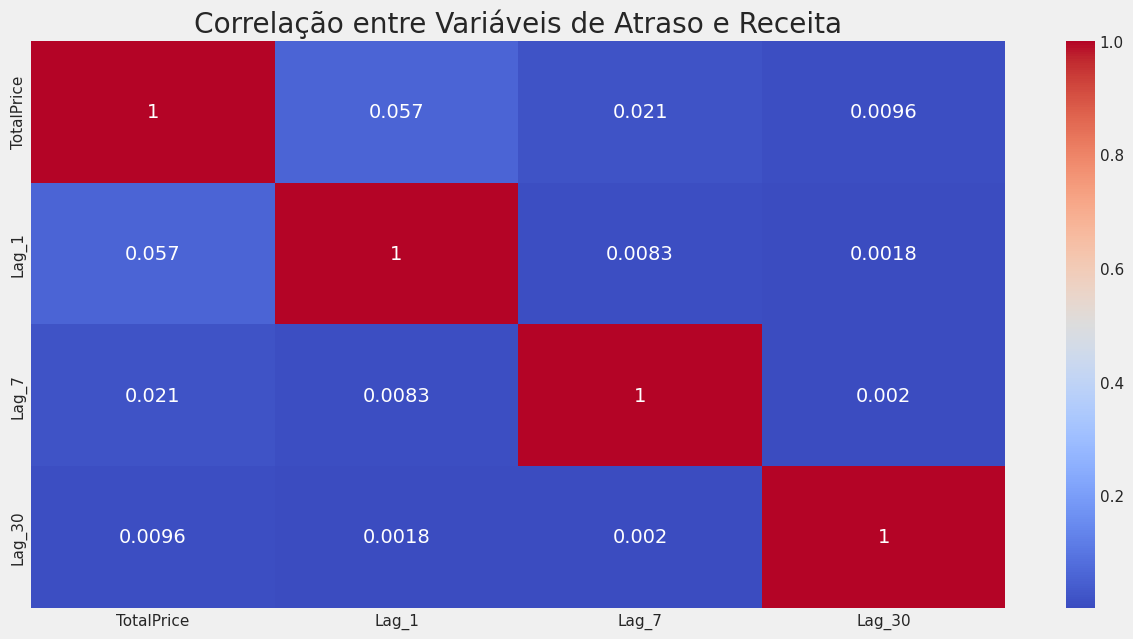

In [83]:
# Criar um dicionário para mapear os números dos dias da semana para os nomes dos dias da semana
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_clean['DayOfWeek'] = df_clean['DayOfWeek'].map(day_of_week_mapping)

# Analisar a receita por dia da semana
day_of_week_sales = df_clean.groupby('DayOfWeek')['TotalPrice'].sum().reset_index()

# Manter a ordem dos dias da semana correta no gráfico
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_sales['DayOfWeek'] = pd.Categorical(day_of_week_sales['DayOfWeek'], categories=day_order, ordered=True)
day_of_week_sales = day_of_week_sales.sort_values('DayOfWeek')

plt.figure(figsize=(14, 7))
sns.barplot(x='DayOfWeek', y='TotalPrice', data=day_of_week_sales)
plt.title('Receita por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita Total')
plt.show()

# Analisar a receita por mês
monthly_sales = df_clean.groupby('Month')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='TotalPrice', data=monthly_sales)
plt.title('Receita por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.show()

# Analisar a correlação entre variáveis de atraso e a receita
plt.figure(figsize=(14, 7))
sns.heatmap(df_clean[['TotalPrice', 'Lag_1', 'Lag_7', 'Lag_30']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis de Atraso e Receita')
plt.show()


### Interpretação e Implicações - Heatmap

- **Previsão de Receita:** A baixa correlação entre a receita atual e as receitas passadas (em diferentes atrasos) sugere que a receita diária pode ser influenciada por fatores externos ou sazonais que não são capturados apenas pelos valores históricos de receita. Isso indica a necessidade de incluir outras variáveis explicativas no modelo preditivo para melhorar a precisão das previsões.
- **Comportamento de Vendas:** A ausência de correlações fortes entre as vendas em diferentes períodos de atraso sugere que o comportamento de compra dos clientes pode ser bastante volátil e não segue padrões consistentes ao longo do tempo.
- **Modelo Preditivo:** Para construir um modelo preditivo eficaz, será importante considerar outras features além das variáveis de atraso, como informações sobre promoções, campanhas de marketing, sazonalidade específica do setor, entre outras.


## Gráfico para venda mensal no Reino Unido, França e Alemanha

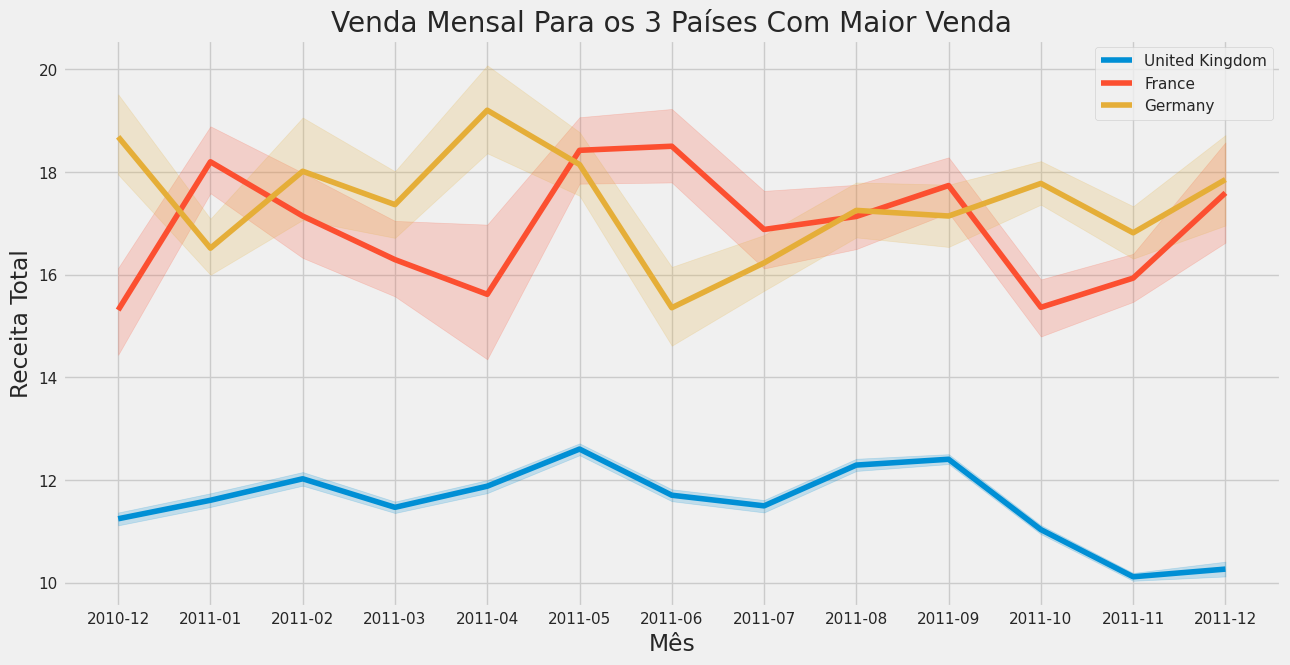

In [74]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='MonthYear', y='TotalPrice', data=df_clean[df_clean['Country'].isin(['United Kingdom', 'Germany', 'France'])], hue='Country')
# sns.lineplot(x='MonthYear', y='TotalPrice', data=df_clean[df_clean['Country'] == 'France'], color='orange')
# sns.lineplot(x='MonthYear', y='TotalPrice', data=df_clean[df_clean['Country'] == 'Germany'], color='green')
plt.title('Venda Mensal Para os 3 Países Com Maior Venda')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.legend()
plt.show()

**Análise Comparativa**:

  - Estabilidade: O Reino Unido apresenta maior estabilidade nas vendas em comparação com a França e a Alemanha.
  - Flutuações: Tanto a França quanto a Alemanha mostram flutuações mais pronunciadas, possivelmente devido a eventos específicos ou campanhas de marketing que afetaram suas vendas.
  - Mês de Novembro: algo interessante a ser notado é que olhando de forma separada, não existe um comportamento de pico para o mês.

  Portanto após esta análise, isto sugere que é interessante desenvolver modelos separados para cada região.

# Construção de Modelos Preditivos

- Nesta etapa iremos criar um modelo a parte para os 4 primeiros países com maior faturamento e ou outros serão agrupados para desenvolver somente um modelo.

In [84]:
from sklearn.preprocessing import StandardScaler

# Selecionar as colunas a serem padronizadas
columns_to_scale = ['TotalPrice', 'Lag_1', 'Lag_7', 'Lag_30']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Padronizar os dados
df_clean[columns_to_scale] = scaler.fit_transform(df_clean[columns_to_scale])

# Verificar os dados padronizados
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,MonthYear,Year,Month,Day,DayOfWeek,Lag_1,Lag_7,Lag_30
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.363573,2010-12,2010,12,1,Wednesday,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.917210,2010-12,2010,12,1,Wednesday,-0.001460,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.099559,2010-12,2010,12,1,Wednesday,0.036025,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.917210,2010-12,2010,12,1,Wednesday,0.048371,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.917210,2010-12,2010,12,1,Wednesday,0.036025,NaN,NaN


In [85]:
# Criar um dicionário para mapear os nomes dos dias da semana para os números
day_of_week_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# Adicionar a nova coluna DayOfWeekNumeric com os valores numéricos correspondentes
df_clean['DayOfWeekNumeric'] = df_clean['DayOfWeek'].map(day_of_week_mapping)

# Verificar o DataFrame atualizado
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,MonthYear,Year,Month,Day,DayOfWeek,Lag_1,Lag_7,Lag_30,DayOfWeekNumeric
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.363573,2010-12,2010,12,1,Wednesday,NaN,NaN,NaN,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.917210,2010-12,2010,12,1,Wednesday,-0.001460,NaN,NaN,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.099559,2010-12,2010,12,1,Wednesday,0.036025,NaN,NaN,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.917210,2010-12,2010,12,1,Wednesday,0.048371,NaN,NaN,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.917210,2010-12,2010,12,1,Wednesday,0.036025,NaN,NaN,2


In [86]:
# Dividir os dados por região
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']
df_fr = df_clean[df_clean['Country'] == 'France']
df_de = df_clean[df_clean['Country'] == 'Germany']
df_eire = df_clean[df_clean['Country'] == 'EIRE']
df_others = df_clean[~df_clean['Country'].\
                     isin(['United Kingdom', 'France', 'Germany', 'EIRE'])]


## Pipeline de modelagem

In [94]:
!pip install scikit-optimize pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


In [95]:
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [97]:
RANDOM_SEED = 14
def train_and_evaluate_models(df, region):
    # Definir as features e o target
    X = df[['Month', 'DayOfWeekNumeric']]
    y = df['TotalPrice']

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

    # Inicializar os modelos
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=RANDOM_SEED),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=RANDOM_SEED),
        'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=RANDOM_SEED)
    }

    results = {}

    for name, model in models.items():
        # Avaliar o modelo usando validação cruzada
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mse = -np.mean(cv_scores)
        results[name] = mse
        print(f'Cross-validated MSE para {region} usando {name}: {mse}')

    # Selecionar o melhor modelo
    best_model_name = min(results, key=results.get)
    best_model = models[best_model_name]
    best_mse = results[best_model_name]
    print(f'Melhor modelo para {region}: {best_model_name} com MSE: {best_mse}')

    return best_model, best_model_name

# Treinar e avaliar os modelos para cada região
model_uk, best_model_uk = train_and_evaluate_models(df_uk, 'Reino Unido')
model_fr, best_model_fr = train_and_evaluate_models(df_fr, 'França')
model_de, best_model_de = train_and_evaluate_models(df_de, 'Alemanha')
model_eire, best_model_eire = train_and_evaluate_models(df_eire, 'EIRE')
model_others, best_model_others = train_and_evaluate_models(df_others, 'Outros')


Cross-validated MSE para Reino Unido usando Linear Regression: 0.9677700886397252
Cross-validated MSE para Reino Unido usando Random Forest: 0.9461171761365481
Cross-validated MSE para Reino Unido usando Gradient Boosting: 0.9471876902873291
Cross-validated MSE para Reino Unido usando XGBoost: 0.9461139956880427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 211459, number of used features: 2
[LightGBM] [Info] Start training from score -0.059435
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 211459, number of used features: 2
[LightGBM] [Info] Start training from score -0.060464
[Lig

In [98]:
#Verificando o melhor modelo para cada região
print(best_model_uk)
print(best_model_fr)
print(best_model_de)
print(best_model_eire)
print(best_model_others)

LightGBM
XGBoost
Random Forest
XGBoost
LightGBM


- Como existem diferentes modelos que se sairam melhor para cada região, logo, será definida uma função para Tunar os hiperparâmetros para cada modelo utilizando otimização bayesiana

In [99]:
def optimize_best_model(best_model_name, best_model, X, y):
    if best_model_name == 'Random Forest':
        param_distributions = {
            'n_estimators': (10, 50, 100, 200),
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': (10, 25, 50)
        }
    elif best_model_name == 'Gradient Boosting':
        param_distributions = {
            'n_estimators': (10, 50, 100, 200),
            'learning_rate': (0.001, 0.01, 0.1),
            'max_depth': (3, 6, 9, 10, 20)
        }
    elif best_model_name == 'XGBoost':
        param_distributions = {
            'n_estimators': (10, 50, 100, 200),
            'learning_rate': (0.001, 0.01, 0.1),
            'max_depth': (3, 6, 9, 10, 20)
        }
    elif best_model_name == 'LightGBM':
        param_distributions = {
            'n_estimators': (510, 50, 100, 200),
            'learning_rate': (0.001, 0.01, 0.1),
            'max_depth': (3, 6, 9, 10, 20)
        }
    else:
        return best_model # Caso o melhor modelo seja a regressão linear

    bayes_search = BayesSearchCV(estimator=best_model,
                                 search_spaces=param_distributions,
                                 n_iter=50,
                                 cv=5,
                                 scoring='neg_mean_squared_error',
                                 random_state=42,
                                 n_jobs=-1)
    bayes_search.fit(X, y)
    return bayes_search.best_estimator_

# Otimizar os melhores modelos para cada região
def optimize_models(df, model, model_name):
    X = df[['Month', 'DayOfWeekNumeric']]
    y = df['TotalPrice']
    best_model = optimize_best_model(model_name, model, X, y)
    return best_model

model_uk = optimize_models(df_uk, model_uk, best_model_uk, 'Reino Unido')
model_fr = optimize_models(df_fr, model_fr, best_model_fr, 'França')
model_de = optimize_models(df_de, model_de, best_model_de, 'Alemanha')
model_eire = optimize_models(df_eire, model_eire, best_model_eire, 'EIRE')
model_others = optimize_models(df_others, model_others, best_model_others, 'Outros')


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 3, 50] before, using random point [0.1, 6, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 3, 200] before, using random point [0.1, 3, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 3, 200] before, using random point [0.001, 10, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 10, 100] before, using random point [0.01, 3, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 3, 200] before, using random point [0.001, 9, 510]
  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 330405, number of used features: 2
[LightGBM] [Info] Start training from score -0.062472


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 3, 50] before, using random point [0.01, 9, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 10, 10] before, using random point [0.001, 9, 200]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 9, 200] before, using random point [0.01, 9, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 9, 100] before, using random point [0.001, 6, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 10, 100] before, using random point [0.1, 3, 50]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 14531, number of used features: 2
[LightGBM] [Info] Start training from score 0.569106


In [104]:
best_model_uk

'LightGBM'

In [105]:
import joblib

# Salvar os modelos treinados
joblib.dump(model_uk, 'model_uk.pkl')
joblib.dump(model_fr, 'model_fr.pkl')
joblib.dump(model_de, 'model_de.pkl')
joblib.dump(model_eire, 'model_eire.pkl')
joblib.dump(model_others, 'model_others.pkl')

# Salvar os nomes dos melhores modelos
best_models = {
    'Reino Unido': best_model_uk,
    'França': best_model_fr,
    'Alemanha': best_model_de,
    'EIRE': best_model_eire,
    'Outros': best_model_others
}

joblib.dump(best_models, 'best_models.pkl')


['best_models.pkl']